# **محاسبه کانولوشن در حوزه فرکانسی**


الف)

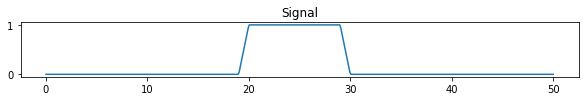

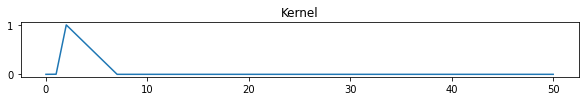

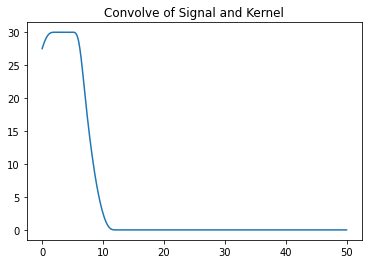

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


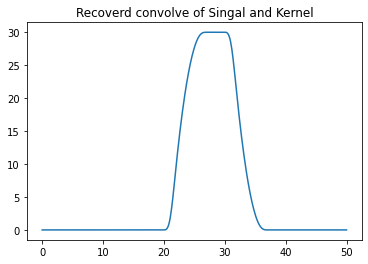

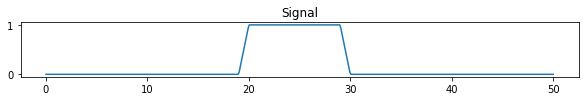

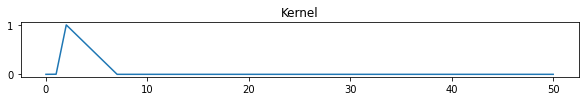

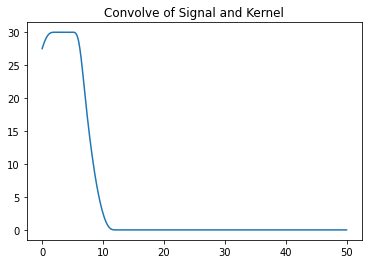

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


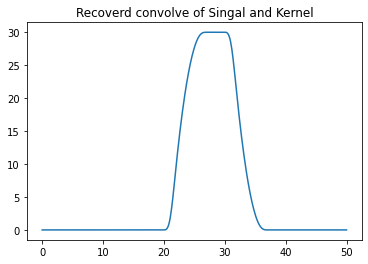

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as fft

t = np.linspace(0, 50, 500)
t2 = np.linspace(0, 10, 100)
def func_sig(t):
  sig =[]
  for i in t:
    sig.append(np.piecewise(i, [i<19, 19<i<20, 20<i<29, 29<i<30, i>30], [0, i-19, 1, -i+30, 0]))
  return sig
  
def func_kernel(t):
  sig =[]
  for i in t:
    sig.append(np.piecewise(i, [i<1, 1<i<2, 2<i<7, i>7], [0, i-1, -(i/5)+7/5, 0]))
  return sig

plt.figure(figsize=(10,1))
sig = func_sig(t)
plt.plot(t, sig)
plt.title("Signal")
plt.show();

plt.figure(figsize=(10,1))
kernel = func_kernel(t)
plt.plot(t, kernel)
plt.title("Kernel")
plt.show();

y_conv = np.convolve(sig, kernel, mode = 'same')
plt.plot(t, y_conv)
plt.title("Convolve of Signal and Kernel")
plt.show();

kernel_ft = fft.fft(kernel)
sig_ft = fft.fft(sig)
kernel_x_sig_ft = kernel_ft * sig_ft

y_conv_2 = fft.ifft(kernel_x_sig_ft)
plt.plot(t, y_conv_2)
plt.title("Recoverd convolve of Singal and Kernel")
plt.show()




# **فیلتر کردن سیگنال در یک بعد**

الف)

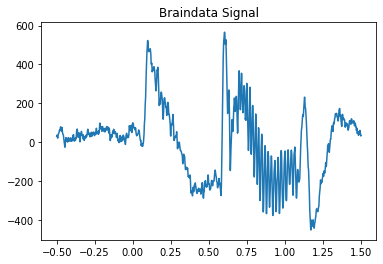

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  del sys.path[0]


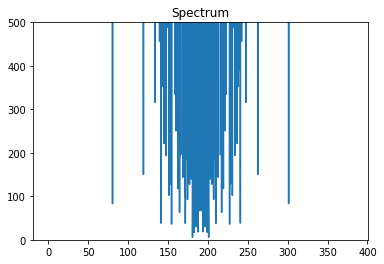

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


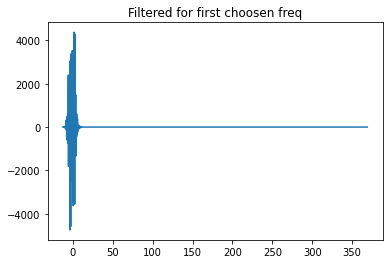

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


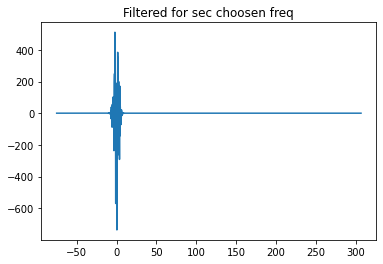

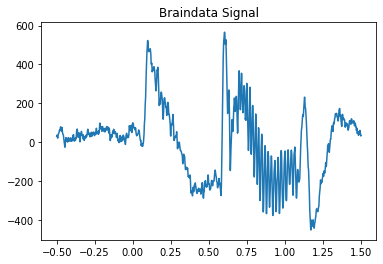

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  del sys.path[0]


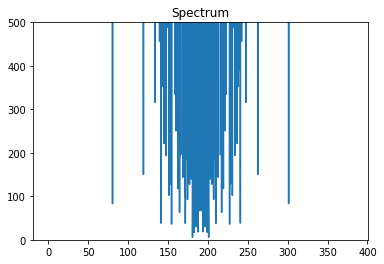

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


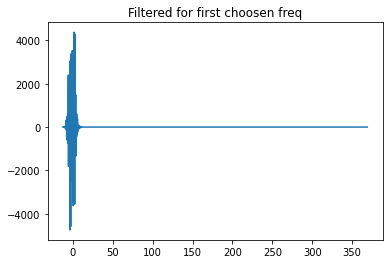

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


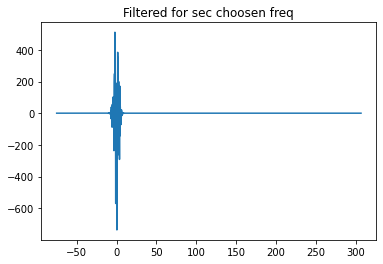

In [20]:
import scipy.io as sio

matdata = sio.loadmat('braindata.mat')
timevec = matdata['timevec']
braindata = matdata['braindata']
samplerate = matdata['srate']

plt.plot(timevec[0], braindata[0])
plt.title("Braindata Signal")
plt.show()

#1
braindata_ft = fft.fft(braindata[0])

#2
braindata_ft_spectrum = np.square(np.abs(braindata_ft))
freq = np.linspace(0, samplerate[0][0]/2, len(braindata_ft_spectrum))
plt.plot(freq, braindata_ft_spectrum)
plt.title("Spectrum")
plt.ylim(0, 500)
plt.show()

#3
choosen_freq1 = freq[50]
choosen_freq2 = freq[300]

#4
freq1 = freq - choosen_freq1
freq2 = freq - choosen_freq2

#5
def gaussian(x):
  power = -1*((x/4)**2)
  return np.exp(power)

#6
braindata_gaussian_freq1 = braindata_ft * gaussian(freq1)
braindata_gaussian_freq2 = braindata_ft * gaussian(freq2)

#7
plt.plot(freq1, braindata_gaussian_freq1)
plt.title("Filtered for first choosen freq")
plt.show()

plt.plot(freq2, braindata_gaussian_freq2)
plt.title("Filtered for sec choosen freq")
plt.show()


# **فیلتر کردن عکس در دو بعد**

**Low Pass Filtering**

الف)

Text(0.5, 1.0, 'Black & white photo')

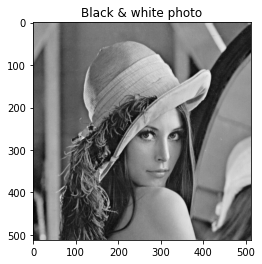

In [23]:
from PIL import Image

lenna = np.asarray(Image.open("Lenna.png"))

def get_BW(x):
  new_x = []
  for i in range (0, len(x)):
    temp2 = []
    for j in range (0, len(x[0])):
      temp = int((int(x[i][j][0]) + int(x[i][j][1]) + int(x[i][j][2])) / 3)
      temp2.append(temp)
    new_x.append(temp2)
  return new_x

lenna_BW = get_BW(lenna)
plt.imshow(lenna_BW, cmap = 'gray')
plt.title("Black & white photo")


ب)

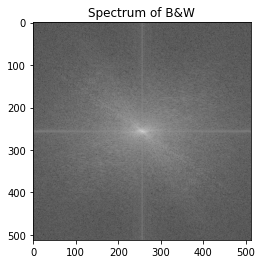

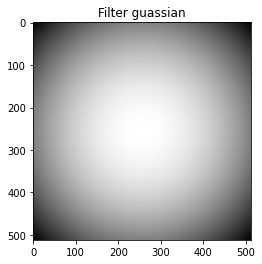

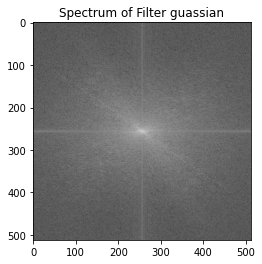

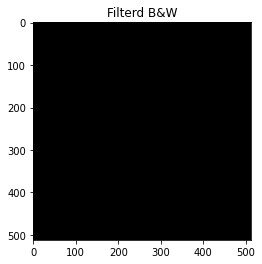

In [26]:
#2
lenna_BW_ft = np.fft.fft2(lenna_BW)
lenna_BW_ft_shift = np.fft.fftshift(lenna_BW_ft)

#3
lenna_BW_spectrum = np.log(np.abs(lenna_BW_ft_shift))
plt.imshow(lenna_BW_spectrum, cmap = 'gray')
plt.title("Spectrum of B&W")
plt.show()

#4
from scipy import stats

def gaussian2d(b_and_w):
  width = 512
  lims = np.shape(b_and_w)
  xr = stats.zscore(np.arange(lims[0]))
  [x, y] = np.meshgrid(xr, xr)
  gaus2d = np.exp( -(x ** 2 + y ** 2) / (2 * width ** 2))
  return gaus2d

plt.imshow(gaussian2d(lenna_BW), cmap = 'gray')
plt.title("Filter guassian")
plt.show()

filterd_lenna = lenna_BW_ft_shift * gaussian2d(lenna_BW)
filterd_spectrum = np.log(np.abs(filterd_lenna))
plt.imshow(filterd_spectrum, cmap = 'gray')
plt.title("Spectrum of Filter guassian")
plt.show()

ifft2 = np.fft.ifft2(np.fft.ifftshift(filterd_spectrum))
plt.imshow(np.abs(ifft2), cmap = 'gray')
plt.title("Filterd B&W")
plt.show()




**High pass filtering**

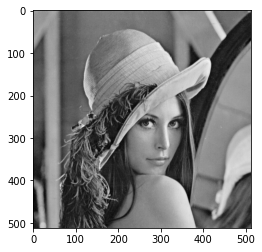

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


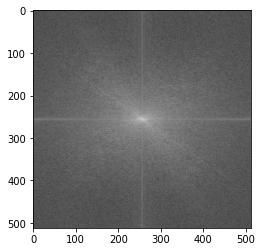

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


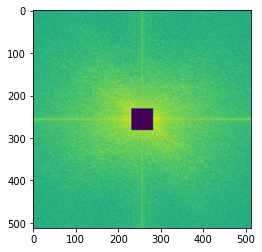

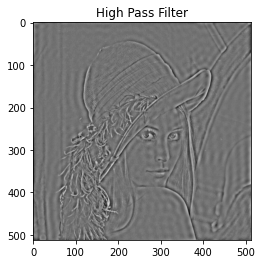

In [39]:
from skimage.io import imread
import matplotlib.pyplot as plt

im = np.mean(imread('Lenna.png'), axis=2)
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

F1 = np.fft.fft2((im).astype(float))
F2 = np.fft.fftshift(F1)
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

(w, h) = im.shape
half_w, half_h = int(w/2), int(h/2)

n = 25
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
plt.show()

im1 = np.fft.ifft2(np.fft.ifftshift(F2)).real
plt.imshow(im1, cmap='gray')
plt.title("High Pass Filter")
plt.show()